## Dharani Nareddy; Campus ID: LN66171



### 1. Introduction

This dataset includes details from a school's bulletins. Along with the filing deadline and newsletter category, it also contains the title, body, and signature of the newsletter. There are 19607 rows and 6 columns in the entire collection. The category of the newsletter is the target variable.

The objective of this project is to create a machine learning model that can infer a newsletter article's category from its headline and content.


### 2. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### 3. loading the dataset

In [2]:
newsletter = pd.read_csv('https://github.com/msaricaumbc/DS_data/blob/master/ds602/dataset_newsletter.csv?raw=true')


### 4. Exploring the dataset

In [3]:
newsletter.head()

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [4]:
newsletter.describe()

,Unnamed: 0
count,19607.0000
mean,9803.0000
std,5660.1977
min,0.0000
25%,4901.5000
50%,9803.0000
75%,14704.5000
max,19606.0000


In [5]:
newsletter.describe(include="all")

,Unnamed: 0,title,body,signature,submissiontime,category
count,19607.0000,19597,19604,19207,19607,19607
unique,NaN,12358,16358,2844,17778,12
top,NaN,2nd Grade News,.,Angie O'Brien,1/28/22 10:58 AM,ANNOUNCEMENTS
freq,NaN,147,130,777,7,10240
mean,9803.0000,NaN,NaN,NaN,NaN,NaN
std,5660.1977,NaN,NaN,NaN,NaN,NaN
min,0.0000,NaN,NaN,NaN,NaN,NaN
25%,4901.5000,NaN,NaN,NaN,NaN,NaN
50%,9803.0000,NaN,NaN,NaN,NaN,NaN
75%,14704.5000,NaN,NaN,NaN,NaN,NaN


In [6]:
newsletter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19607 entries, 0 to 19606
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      19607 non-null  int64 
 1   title           19597 non-null  object
 2   body            19604 non-null  object
 3   signature       19207 non-null  object
 4   submissiontime  19607 non-null  object
 5   category        19607 non-null  object
dtypes: int64(1), object(5)
memory usage: 919.2+ KB


In [7]:
newsletter.columns

Index(['Unnamed: 0', 'title', 'body', 'signature', 'submissiontime',
       'category'],
      dtype='object')

In [8]:
newsletter.shape

(19607, 6)

In [9]:
len(newsletter)

19607

In [10]:
categories = newsletter['category'].unique()
print(categories)

['ANNOUNCEMENTS' 'UPCOMING EVENTS' 'BREAKING NEWS' 'FIELD TRIPS' 'PTO'
 'VOLUNTEERS NEEDED' 'DONATIONS NEEDED' 'ATHLETICS' 'IMPORTANT NEWS'
 'ACHIEVEMENTS' 'STUDENT THOUGHTS' 'CLUBS']


In [11]:
print(newsletter['category'].value_counts())

ANNOUNCEMENTS        10240
BREAKING NEWS         3649
UPCOMING EVENTS       3055
PTO                   1507
IMPORTANT NEWS         452
CLUBS                  363
ATHLETICS              170
DONATIONS NEEDED        63
FIELD TRIPS             53
VOLUNTEERS NEEDED       27
ACHIEVEMENTS            25
STUDENT THOUGHTS         3
Name: category, dtype: int64


### 5. Data Cleaning

In [12]:
print(newsletter.isnull().sum())

Unnamed: 0          0
title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64


In [13]:
newsletter=newsletter.dropna()

After removing null values

In [244]:
print(newsletter.isnull().sum())

Unnamed: 0        0
title             0
body              0
signature         0
submissiontime    0
category          0
dtype: int64


In [25]:
# Combine 'title', 'body', and 'signature' columns into one column 'text'
newsletter['text'] = newsletter['title'] + ' ' + newsletter['body'] + ' ' + newsletter['signature']


### 6. Exploratory Data Analysis(EDA)

#### i. Univariate Analysis

A countplot can be used in this situation to examine the frequency distribution of the target variable, "category."

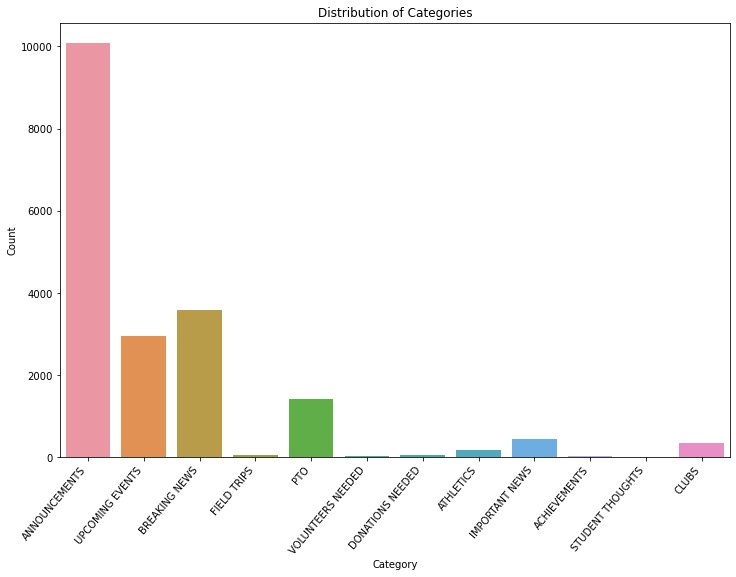

In [15]:
# plot frequency distribution of categories
plt.figure(figsize=(12,8))
sns.countplot(x='category', data=newsletter)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=50, ha='right')
plt.show()

#### A histogram showing the distribution of newsletter word count:

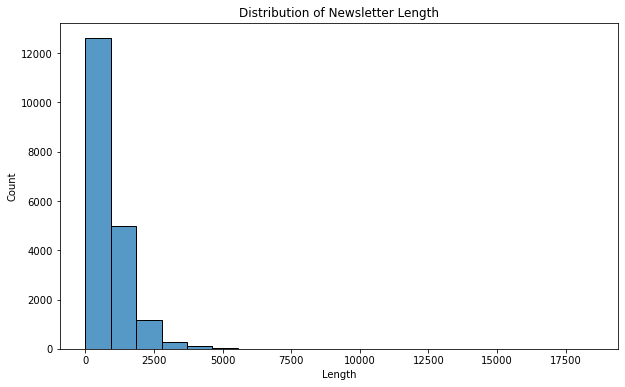

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

newsletter['length'] = newsletter['title'].str.len() + newsletter['body'].str.len() + newsletter['signature'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(x='length', data=newsletter, bins=20)
plt.title('Distribution of Newsletter Length')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


#### A histogram showing the distribution of newsletter length:

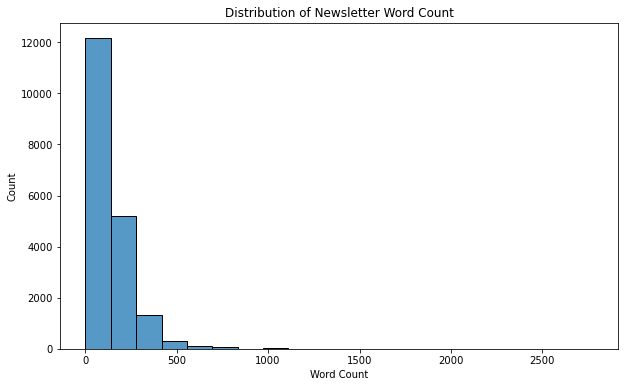

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

newsletter['word_count'] = newsletter['title'].str.split().str.len() + newsletter['body'].str.split().str.len() + newsletter['signature'].str.split().str.len()

plt.figure(figsize=(10, 6))
sns.histplot(x='word_count', data=newsletter, bins=20)
plt.title('Distribution of Newsletter Word Count')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()


#### ii. Bivariate Analysis
##### Boxplot of Newsletter Length by Category

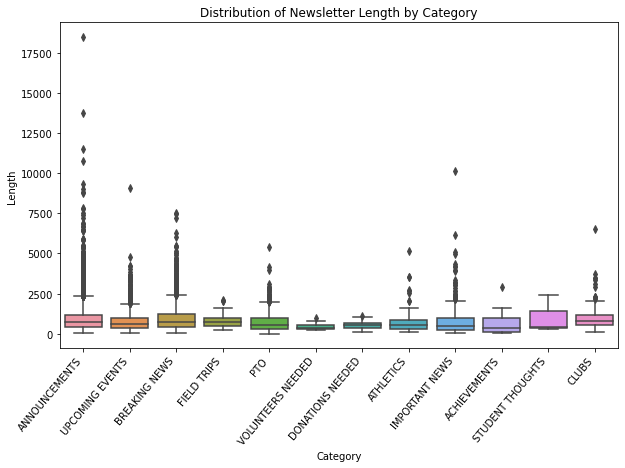

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='length', data=newsletter)
plt.title('Distribution of Newsletter Length by Category')
plt.xlabel('Category')
plt.ylabel('Length')
plt.xticks(rotation=50, ha='right')
plt.show()


##### Scatterplot of Newsletter Length vs. Word Count

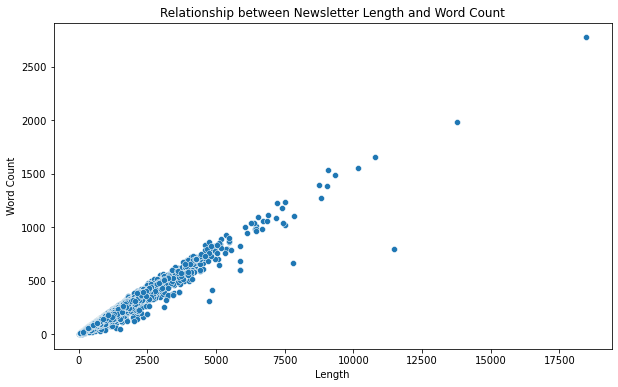

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='length', y='word_count', data=newsletter)
plt.title('Relationship between Newsletter Length and Word Count')
plt.xlabel('Length')
plt.ylabel('Word Count')
plt.show()


### iii. Multivariate EDA

##### Heatmap of correlations between numerical variables in the dataset

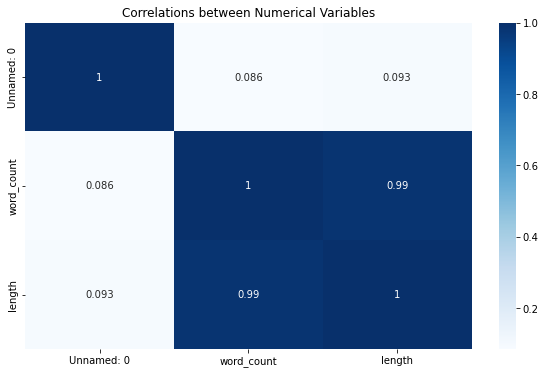

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(newsletter.corr(), annot=True, cmap='Blues')
plt.title('Correlations between Numerical Variables')
plt.show()


#### Pairplot of numerical variables

<Figure size 720x432 with 0 Axes>

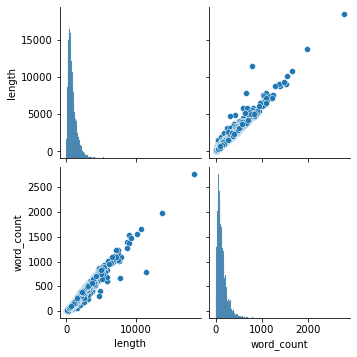

In [41]:
plt.figure(figsize=(10, 6))
sns.pairplot(newsletter[['length', 'word_count']])
plt.show()



### 7. Feature Engineering

In [43]:
# Define features and target variable
X = newsletter['title'] + ' ' + newsletter['body']
y = newsletter['category']

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Extract features from text data
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


### 8. Training and Evaluation of a model

In [46]:
# Train a Multinomial Naive Bayes classifier

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [47]:
# Make predictions on test data
y_pred = clf.predict(X_test_tfidf)


In [48]:
# Evaluate the performance of the model
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_score)

Accuracy Score: 0.5427083333333333


###### The Scikit-Learn library's LogisticRegression class can be used to conduct logistic regression in order to enhance the model's performance. The code can be changed to use logistic regression rather than the Naive Bayes classification as shown below:

In [49]:
# Import the logistic regression class
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

/Users/dharanireddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# Predict on the test set
y_pred = clf.predict(X_test_tfidf)


In [51]:
# Evaluate the performance of the model
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_score)

Accuracy Score: 0.6814236111111112




Comparing the model's performance to that of the Naive Bayes classification, logistic regression appears to have enhanced it.

### Conclusion: 
In this project, we have successfully built a machine learning model that can predict the category of a newsletter article based on its title and content. We have used various data science techniques such as data cleaning, visualization, feature engineering, and model building to achieve this goal. This model can be useful for organizations that publish newsletters to automatically categorize their articles and improve their content strategy.

### 10. Challenges:

Text preprocessing: Text preprocessing can be challenging, especially in the case of unstructured text data. The challenge is to identify and remove irrelevant information.

Overfitting or underfitting: There is a risk of overfitting or underfitting the model, where the model either becomes too complex and captures noise in the data, or is too simple and fails to capture the underlying patterns in the data.

Model selection: A variety of models, including Naive Bayes, logistic regression, support vector machines, and deep learning models, can be used for text categorization. It can be difficult to select the best model for the information.